# Hybrid Search (Fusion & Reranking) using Qdrant

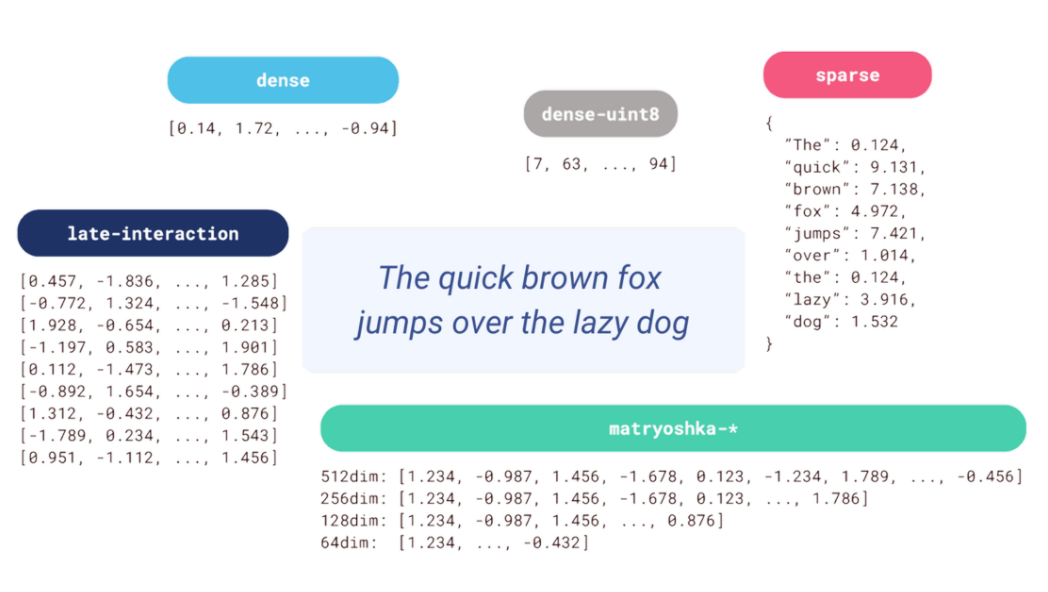

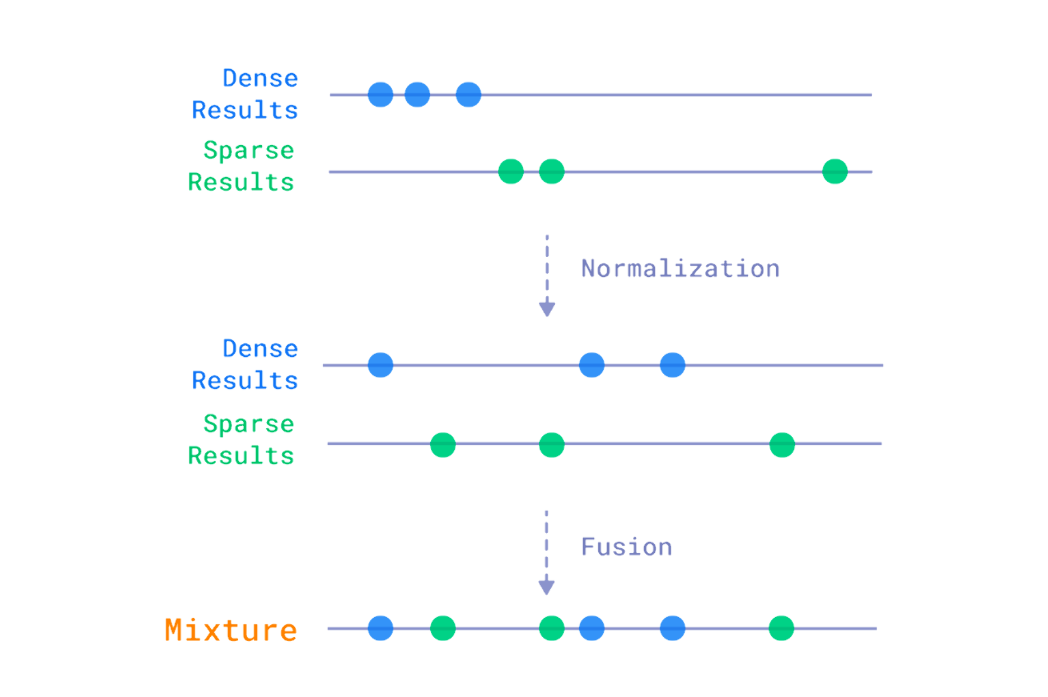

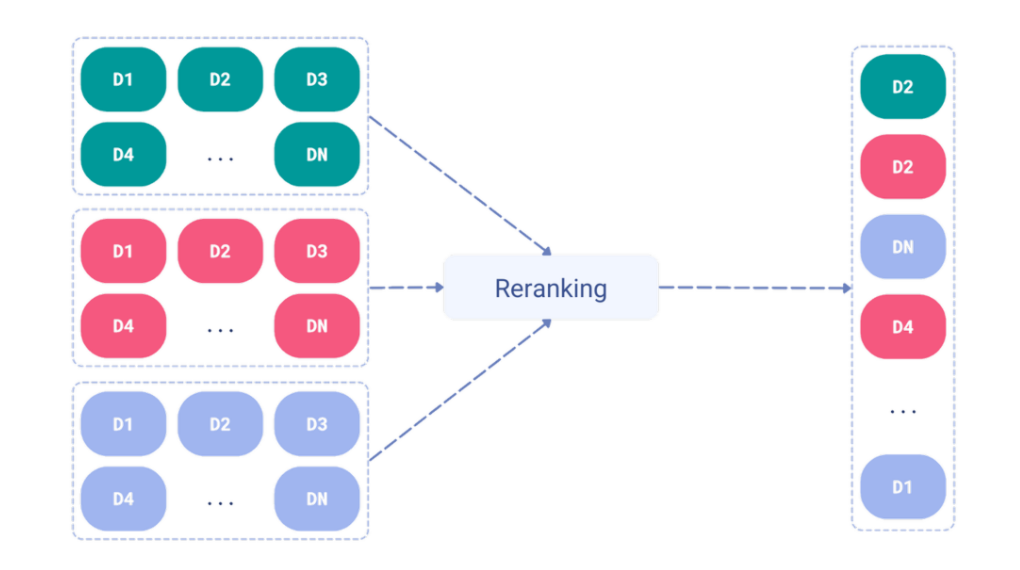

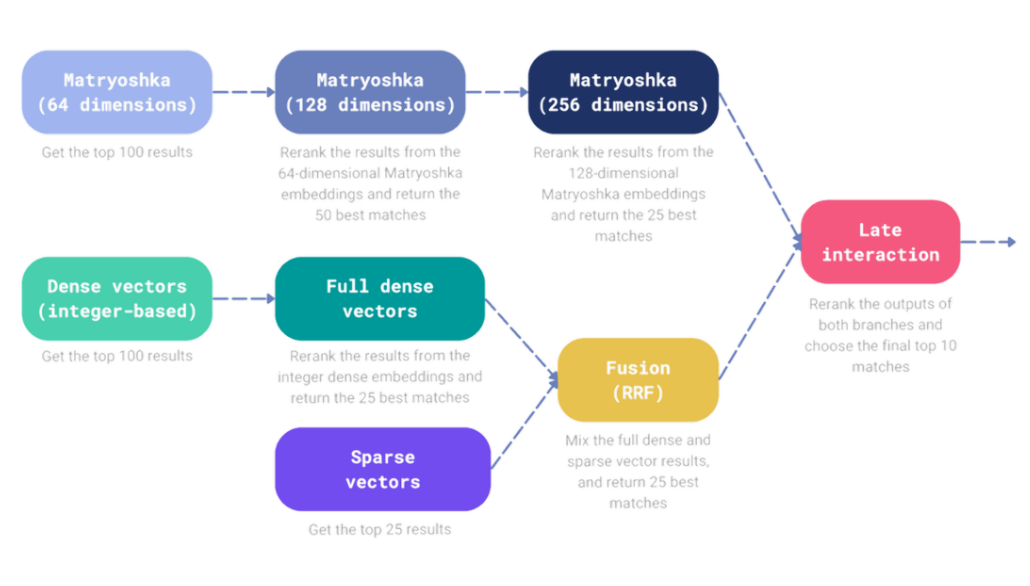

In [ ]:
!pip install datasets fastembed qdrant-client

In [ ]:
from datasets import load_dataset

dataset = load_dataset("BeIR/scifact", "corpus", split="corpus")
dataset[0]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating corpus split:   0%|          | 0/5183 [00:00<?, ? examples/s]

{'_id': '4983',
 'title': 'Microstructural development of human newborn cerebral white matter assessed in vivo by diffusion tensor magnetic resonance imaging.',
 'text': 'Alterations of the architecture of cerebral white matter in the developing human brain can affect cortical development and result in functional disabilities. A line scan diffusion-weighted magnetic resonance imaging (MRI) sequence with diffusion tensor analysis was applied to measure the apparent diffusion coefficient, to calculate relative anisotropy, and to delineate three-dimensional fiber architecture in cerebral white matter in preterm (n = 17) and full-term infants (n = 7). To assess effects of prematurity on cerebral white matter development, early gestation preterm infants (n = 10) were studied a second time at term. In the central white matter the mean apparent diffusion coefficient at 28 wk was high, 1.8 microm2/ms, and decreased toward term to 1.2 microm2/ms. In the posterior limb of the internal capsule, t

In [ ]:
len(dataset)

5183

## Dense embeddings

In [ ]:
from fastembed import TextEmbedding

dense_embedding_model = TextEmbedding("sentence-transformers/all-MiniLM-L6-v2")
dense_embeddings = list(dense_embedding_model.passage_embed(dataset["text"][0:1]))
# len(dense_embeddings)
dense_embeddings


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

[array([ 5.83464876e-02, -9.36398730e-02, -6.46546623e-03,  6.63160607e-02,
         1.54348761e-02,  3.80614363e-02, -5.89603819e-02, -1.59718450e-02,
        -1.05514880e-02, -3.12634395e-03, -2.87247356e-02,  3.09144929e-02,
        -1.16911225e-01,  4.80605215e-02, -5.82385771e-02,  1.15273031e-03,
        -4.22238838e-03, -2.09910031e-02, -3.28464210e-02,  3.46157774e-02,
        -2.30343957e-02, -2.63648806e-03, -4.40302081e-02, -5.03999814e-02,
         2.81327125e-02,  5.89946173e-02,  7.19979405e-02, -2.40114648e-02,
         1.02819078e-01,  5.32090738e-02,  1.16048202e-01, -1.88994892e-02,
         4.01282981e-02,  2.10518837e-02, -6.21539764e-02, -1.87604204e-02,
         8.24814476e-03, -8.04599822e-02, -9.98516940e-03, -4.66372520e-02,
         2.93855295e-02,  2.12256517e-02, -5.30969761e-02,  1.18336938e-02,
         8.74061417e-03,  7.68805214e-04,  5.71988858e-02, -9.47674438e-02,
         1.18084596e-02, -7.58679062e-02,  4.36951742e-02, -6.13637827e-03,
        -1.0

In [ ]:
len(dense_embeddings[0])

384

## Sparse embeddings

In [ ]:
from fastembed import SparseTextEmbedding

bm25_embedding_model = SparseTextEmbedding("Qdrant/bm25")
bm25_embeddings = list(bm25_embedding_model.passage_embed(dataset["text"][0:1]))
# len(bm25_embeddings)
bm25_embeddings

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

arabic.txt:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

azerbaijani.txt:   0%|          | 0.00/967 [00:00<?, ?B/s]

chinese.txt:   0%|          | 0.00/5.56k [00:00<?, ?B/s]

bengali.txt:   0%|          | 0.00/5.44k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

catalan.txt:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

danish.txt:   0%|          | 0.00/424 [00:00<?, ?B/s]

basque.txt:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

finnish.txt:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

french.txt:   0%|          | 0.00/813 [00:00<?, ?B/s]

dutch.txt:   0%|          | 0.00/453 [00:00<?, ?B/s]

greek.txt:   0%|          | 0.00/2.17k [00:00<?, ?B/s]

english.txt:   0%|          | 0.00/936 [00:00<?, ?B/s]

hebrew.txt:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

hungarian.txt:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

kazakh.txt:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

indonesian.txt:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

italian.txt:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

german.txt:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

norwegian.txt:   0%|          | 0.00/851 [00:00<?, ?B/s]

nepali.txt:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

hinglish.txt:   0%|          | 0.00/5.96k [00:00<?, ?B/s]

portuguese.txt:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

slovene.txt:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

romanian.txt:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

russian.txt:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

spanish.txt:   0%|          | 0.00/2.18k [00:00<?, ?B/s]

swedish.txt:   0%|          | 0.00/559 [00:00<?, ?B/s]

turkish.txt:   0%|          | 0.00/260 [00:00<?, ?B/s]

tajik.txt:   0%|          | 0.00/1.82k [00:00<?, ?B/s]

[SparseEmbedding(values=array([1.05924393, 1.42998604, 1.73332307, 1.96487964, 1.96487964,
        1.73332307, 1.05924393, 1.05924393, 1.05924393, 1.05924393,
        1.05924393, 1.05924393, 1.05924393, 1.05924393, 1.05924393,
        1.96487964, 1.05924393, 1.05924393, 1.05924393, 1.05924393,
        1.61885599, 1.05924393, 1.61885599, 1.05924393, 1.05924393,
        1.05924393, 1.61885599, 1.73332307, 1.05924393, 1.61885599,
        1.61885599, 1.05924393, 1.05924393, 1.05924393, 1.61885599,
        1.73332307, 1.61885599, 1.05924393, 1.61885599, 1.93897663,
        1.86520947, 1.05924393, 1.42998604, 1.05924393, 1.05924393,
        1.42998604, 1.05924393, 1.42998604, 1.05924393, 1.05924393,
        1.42998604, 1.61885599, 1.61885599, 1.42998604, 1.42998604,
        1.05924393, 1.93897663, 1.05924393, 1.73332307, 1.73332307,
        1.05924393, 1.05924393, 1.42998604, 1.05924393, 1.05924393,
        1.61885599, 1.61885599, 1.05924393, 1.73332307, 1.42998604,
        1.05924393, 1.059

## Late interaction embeddings

In [ ]:
from fastembed import LateInteractionTextEmbedding

late_interaction_embedding_model = LateInteractionTextEmbedding("colbert-ir/colbertv2.0")
late_interaction_embeddings = list(late_interaction_embedding_model.passage_embed(dataset["text"][0:1]))
# len(late_interaction_embeddings)
late_interaction_embeddings

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/436M [00:00<?, ?B/s]

[array([[-0.02298645,  0.09077498, -0.107761  , ...,  0.223444  ,
          0.00343488,  0.0665011 ],
        [-0.05713906, -0.0153341 , -0.04804548, ...,  0.14908642,
         -0.02973748,  0.08847252],
        [-0.03361404,  0.04338084, -0.02590396, ...,  0.04176923,
         -0.07707106,  0.04129999],
        ...,
        [ 0.04534954,  0.06146195, -0.10545544, ...,  0.12236803,
          0.08105171,  0.09699839],
        [-0.        ,  0.        , -0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.07415115,  0.0419703 , -0.1290326 , ...,  0.18041554,
          0.06661528,  0.10894404]], dtype=float32)]

In [ ]:
len(late_interaction_embeddings[0][0])

128

## Putting data in a Qdrant collection

All the vectors might be now upserted into a Qdrant collection. Keeping them all in a single one enables the possibility to combine different embeddings and create even a complex pipeline with several steps. Depending on the specifics of your data, you may prefer to use a different approach.

In [ ]:
# !pip install docker

# !docker pull qdrant/qdrant

# !docker run -p 6333:6333 -p 6334:6334



In [ ]:
from qdrant_client import QdrantClient, models

# client = QdrantClient("http://localhost:6333")
client = QdrantClient(":memory:")


client.create_collection(
    "scifact",
    vectors_config={
        "all-MiniLM-L6-v2": models.VectorParams(
            size=len(dense_embeddings[0]),
            distance=models.Distance.COSINE,
        ),
        "colbertv2.0": models.VectorParams(
            size=len(late_interaction_embeddings[0][0]),
            distance=models.Distance.COSINE,
            multivector_config=models.MultiVectorConfig(
                comparator=models.MultiVectorComparator.MAX_SIM,
            )
        ),
    },
    sparse_vectors_config={
        "bm25": models.SparseVectorParams(
            modifier=models.Modifier.IDF,
        )
    }
)

True

In [ ]:
import tqdm

batch_size = 4
for batch in tqdm.tqdm(dataset.iter(batch_size=batch_size),
                       total=len(dataset) // batch_size):
    dense_embeddings = list(dense_embedding_model.passage_embed(batch["text"]))
    bm25_embeddings = list(bm25_embedding_model.passage_embed(batch["text"]))
    late_interaction_embeddings = list(late_interaction_embedding_model.passage_embed(batch["text"]))

    client.upload_points(
        "scifact",
        points=[
            models.PointStruct(
                id=int(batch["_id"][i]),
                vector={
                    "all-MiniLM-L6-v2": dense_embeddings[i].tolist(),
                    "bm25": bm25_embeddings[i].as_object(),
                    "colbertv2.0": late_interaction_embeddings[i].tolist(),
                },
                payload={
                    "_id": batch["_id"][i],
                    "title": batch["title"][i],
                    "text": batch["text"][i],
                }
            )
            for i, _ in enumerate(batch["_id"])
        ],
        # We send a lot of embeddings at once, so it's best to reduce the batch size.
        # Otherwise, we would have gigantic requests sent for each batch and we can
        # easily reach the maximum size of a single request.
        batch_size=batch_size,
    )

1296it [32:37,  1.51s/it]


In [ ]:
# client.recover_snapshot(
#     "scifact",
#     location="https://storage.googleapis.com/common-datasets-snapshots/scifact-multiple-representations.snapshot",
# )

In [ ]:
client.get_collection("scifact")

CollectionInfo(status=<CollectionStatus.GREEN: 'green'>, optimizer_status=<OptimizersStatusOneOf.OK: 'ok'>, vectors_count=None, indexed_vectors_count=0, points_count=5183, segments_count=1, config=CollectionConfig(params=CollectionParams(vectors={'all-MiniLM-L6-v2': VectorParams(size=384, distance=<Distance.COSINE: 'Cosine'>, hnsw_config=None, quantization_config=None, on_disk=None, datatype=None, multivector_config=None), 'colbertv2.0': VectorParams(size=128, distance=<Distance.COSINE: 'Cosine'>, hnsw_config=None, quantization_config=None, on_disk=None, datatype=None, multivector_config=MultiVectorConfig(comparator=<MultiVectorComparator.MAX_SIM: 'max_sim'>))}, shard_number=None, sharding_method=None, replication_factor=None, write_consistency_factor=None, read_fan_out_factor=None, on_disk_payload=None, sparse_vectors={'bm25': SparseVectorParams(index=None, modifier=<Modifier.IDF: 'idf'>)}), hnsw_config=HnswConfig(m=16, ef_construct=100, full_scan_threshold=10000, max_indexing_threads

In [ ]:
client.count("scifact")

CountResult(count=5183)

In [ ]:
query_text = "What is the impact of COVID-19 on the environment?"

In [ ]:
client.query_points(
    "scifact",
    query=next(dense_embedding_model.query_embed(query_text)),
    using="all-MiniLM-L6-v2",
    limit=10,
    with_payload=False,
)

QueryResponse(points=[ScoredPoint(id=13770184, version=0, score=0.37506570191676447, payload=None, vector=None, shard_key=None, order_value=None), ScoredPoint(id=2097256, version=0, score=0.3606346102744483, payload=None, vector=None, shard_key=None, order_value=None), ScoredPoint(id=13882658, version=0, score=0.35937386170399704, payload=None, vector=None, shard_key=None, order_value=None), ScoredPoint(id=1215116, version=0, score=0.35598304227260175, payload=None, vector=None, shard_key=None, order_value=None), ScoredPoint(id=25897733, version=0, score=0.3545683577464993, payload=None, vector=None, shard_key=None, order_value=None), ScoredPoint(id=22401061, version=0, score=0.34815575393818343, payload=None, vector=None, shard_key=None, order_value=None), ScoredPoint(id=27866735, version=0, score=0.3396922954136211, payload=None, vector=None, shard_key=None, order_value=None), ScoredPoint(id=11936877, version=0, score=0.33812556376909125, payload=None, vector=None, shard_key=None, or

# **Benchmarking**

In [ ]:
from datasets import load_dataset

queries = load_dataset("BeIR/scifact", "queries", split="queries")
len(queries)

queries/queries/0000.parquet:   0%|          | 0.00/67.5k [00:00<?, ?B/s]

Generating queries split:   0%|          | 0/1109 [00:00<?, ? examples/s]

1109

In [ ]:
query_qrels = load_dataset("BeIR/scifact-qrels", split="train")
len(query_qrels)


README.md:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/919 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/339 [00:00<?, ? examples/s]

919

In [ ]:
query_qrels[2]

{'query-id': 4, 'corpus-id': 22942787, 'score': 1}

## **Building the ground truth dataset**
The ground truth is a dataset of the queries with their best matches. Each of the matches needs a relevancy measure. In the simplest case that might be just binary information

In [ ]:
for entry in query_qrels:
    print(entry)
    break

{'query-id': 0, 'corpus-id': 31715818, 'score': 1}


In [ ]:
!pip install ranx
from ranx import Qrels
from collections import defaultdict

qrels_dict = defaultdict(dict)
for entry in query_qrels:
    query_id = str(entry["query-id"])
    doc_id = str(entry["corpus-id"])
    qrels_dict[query_id][doc_id] = entry["score"]

qrels = Qrels(qrels_dict, name="scifact")
qrels

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.2/249.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.9/347.9 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.4 MB/s eta 0:00:00
  Created wheel for warc3-wet-clueweb09: filename=warc3_wet_clueweb09-0.2.5-py3-none-any.whl size=18920 sha256=e65fa0563cc1e91b4aff86780671b608605b14f9077ee85983856125e194e8dd
  Stored in directory: /root/.cache/pip/wheels/63/f9/dc/2dd16d3330e327236e4d407941975c42d5159d200cdb7922d8
  Created wheel for cbor: filename=cbor-1.0.0-cp311-cp311-linux_x86_64.whl size=5392

DictType[unicode_type,DictType[[unichr x 9],int64]<iv=None>]<iv=None>({0: {31715818: 1}, 10: {32587939: 1}, 1000: {16472469: 1}, 1001: {5702790: 1}, 1002: {13639330: 1}, 1003: {14332945: 1, 4319844: 1, 4899981: 1}, 1004: {301838: 1, 2734421: 1, 3952288: 1}, 1005: {301838: 1, 2734421: 1, 3952288: 1}, 1006: {4926049: 1}, 1008: {2547636: 1}, 1009: {1982286: 1}, 1011: {9745001: 1}, 1015: {6277638: 1}, 1016: {6277638: 1}, 1018: {11603066: 1}, 1023: {16927286: 1}, 1025: {32408470: 1}, 1026: {3113630: 1}, 1027: {3113630: 1}, 1028: {13923140: 1, 11899391: 1}, 1030: {6441369: 1}, 1031: {12486491: 1}, 1032: {6836086: 1}, 1033: {6836086: 1}, 1034: {4547102: 1}, 1035: {4547102: 1}, 1036: {4547102: 1}, 1037: {16287725: 1}, 1038: {16287725: 1}, 104: {40164383: 1}, 1040: {25254425: 1, 16626264: 1}, 1042: {17421851: 1}, 1043: {17671145: 1}, 1044: {22500262: 1}, 1045: {22500262: 1}, 1046: {418246: 1, 4324278: 1, 16712164: 1}, 1047: {14706752: 1}, 1048: {12486491: 1}, 105: {36606083: 1}, 1050: {19878070

# **Precalculating the embeddings**

We'll test various hybrid pipelines, so it is a good idea to precompute all the query vectors beforehand.

In [ ]:
import tqdm

dense_vectors, sparse_vectors, late_vectors = [], [], []
for query in tqdm.tqdm(queries):
    dense_query_vector = next(dense_embedding_model.query_embed(query["text"]))
    sparse_query_vector = next(bm25_embedding_model.query_embed(query["text"]))
    late_query_vector = next(late_interaction_embedding_model.query_embed(query["text"]))

    dense_vectors.append(dense_query_vector)
    sparse_vectors.append(sparse_query_vector)
    late_vectors.append(late_query_vector)

100%|██████████| 1109/1109 [00:40<00:00, 27.22it/s]


## **Testing various search pipelines**
The ground truth dataset is ready, so we can start with calculating the effectiveness of each of our search methods separately.

## **Dense embeddings**

In [ ]:
from ranx import Run

run_dict = {}
for query_idx, query in enumerate(queries):
    query_id = str(query["_id"])

    query_vector = dense_vectors[query_idx]

    results = client.query_points(
        "scifact",
        query=query_vector,
        using="all-MiniLM-L6-v2",
        with_payload=False,
        limit=10,
    )

    run_dict[query_id] = {
        str(point.id): point.score
        for point in results.points
    }

dense_run = Run(run_dict, name="all-MiniLM-L6-v2")

In [ ]:
from ranx import evaluate

evaluate(qrels, dense_run, metrics=["precision@10", "mrr@10"], make_comparable=True)

/usr/local/lib/python3.11/dist-packages/ranx/metrics/precision.py:24: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  scores[i] = _precision(qrels[i], run[i], k, rel_lvl)


{'precision@10': 0.08529048207663782, 'mrr@10': 0.5842746286813036}

## **Sparse embeddings**

In [ ]:
run_dict = {}
for query_idx, query in tqdm.tqdm(enumerate(queries)):
    query_id = str(query["_id"])

    query_vector = sparse_vectors[query_idx]

    results = client.query_points(
        "scifact",
        query=models.SparseVector(**query_vector.as_object()),
        using="bm25",
        with_payload=False,
        limit=10,
    )

    run_dict[query_id] = {
        str(point.id): point.score
        for point in results.points
    }

bm25_run = Run(run_dict, name="bm25")
evaluate(qrels, bm25_run, metrics=["precision@10", "mrr@10"], make_comparable=True)

1109it [03:15,  5.68it/s]


{'precision@10': 0.0892459826946848, 'mrr@10': 0.6569917789942511}

## **Late interaction model**

Late interaction model is the slowest option out there. That's why it's usually used as a reranking component, not a standalone mechanism.

In [ ]:
run_dict = {}
for query_idx, query in enumerate(queries):
    query_id = str(query["_id"])

    query_vector = late_vectors[query_idx]

    results = client.query_points(
        "scifact",
        query=query_vector,
        using="colbertv2.0",
        with_payload=False,
        limit=10,
    )

    run_dict[query_id] = {
        str(point.id): point.score
        for point in results.points
    }

colbert_run = Run(run_dict, name="colbert")
evaluate(qrels, colbert_run, metrics=["precision@10", "mrr@10"], make_comparable=True)

{'precision@10': 0.09060568603213844, 'mrr@10': 0.6673004100692604}

## **Reciprocal Rank Fusion (Dense & sparse only)**

In [ ]:
run_dict = {}
for query_idx, query in tqdm.tqdm(enumerate(queries)):
    query_id = str(query["_id"])

    dense_query_vector = dense_vectors[query_idx]
    sparse_query_vector = sparse_vectors[query_idx]

    prefetch = [
        models.Prefetch(
            query=dense_query_vector,
            using="all-MiniLM-L6-v2",
            limit=20,
        ),
        models.Prefetch(
            query=models.SparseVector(**sparse_query_vector.as_object()),
            using="bm25",
            limit=20,
        ),
    ]
    results = client.query_points(
        "scifact",
        prefetch=prefetch,
        query=models.FusionQuery(
            fusion=models.Fusion.RRF,
        ),
        with_payload=False,
        limit=10,
    )

    run_dict[query_id] = {
        str(point.id): point.score
        for point in results.points
    }

rrf_run = Run(run_dict, name="rrf")
evaluate(qrels, rrf_run, metrics=["precision@10", "mrr@10"], make_comparable=True)

1109it [04:02,  4.57it/s]


{'precision@10': 0.09431396786155746, 'mrr@10': 0.65800321776836}

## **All the methods in parallel**

In [ ]:
run_dict = {}
for query_idx, query in enumerate(queries):
    query_id = str(query["_id"])

    dense_query_vector = dense_vectors[query_idx]
    sparse_query_vector = sparse_vectors[query_idx]
    late_query_vector = late_vectors[query_idx]

    prefetch = [
        models.Prefetch(
            query=dense_query_vector,
            using="all-MiniLM-L6-v2",
            limit=20,
        ),
        models.Prefetch(
            query=models.SparseVector(**sparse_query_vector.as_object()),
            using="bm25",
            limit=20,
        ),
        models.Prefetch(
            query=late_query_vector,
            using="colbertv2.0",
            limit=20,
        ),
    ]
    results = client.query_points(
        "scifact",
        prefetch=prefetch,
        query=models.FusionQuery(
            fusion=models.Fusion.RRF,
        ),
        with_payload=False,
        limit=10,
    )

    run_dict[query_id] = {
        str(point.id): point.score
        for point in results.points
    }

full_rrf_run = Run(run_dict, name="full_rrf")
evaluate(qrels, full_rrf_run, metrics=["precision@10", "mrr@10"], make_comparable=True)

{'precision@10': 0.09542645241038318, 'mrr@10': 0.7026443581140738}

## **Reranking with late interaction model**

In [ ]:
run_dict = {}
for query_idx, query in enumerate(queries):
    query_id = str(query["_id"])

    dense_query_vector = dense_vectors[query_idx]
    sparse_query_vector = sparse_vectors[query_idx]
    late_query_vector = late_vectors[query_idx]

    prefetch = [
        models.Prefetch(
            query=dense_query_vector,
            using="all-MiniLM-L6-v2",
            limit=20,
        ),
        models.Prefetch(
            query=models.SparseVector(**sparse_query_vector.as_object()),
            using="bm25",
            limit=20,
        ),
    ]
    results = client.query_points(
        "scifact",
        prefetch=prefetch,
        query=late_query_vector,
        using="colbertv2.0",
        with_payload=False,
        limit=10,
    )

    run_dict[query_id] = {
        str(point.id): point.score
        for point in results.points
    }

reranking_run = Run(run_dict, name="reranking")
evaluate(qrels, reranking_run, metrics=["precision@10", "mrr@10"], make_comparable=True)

{'precision@10': 0.09270704573547589, 'mrr@10': 0.6773632938960503}

## **Multistep retrieval process**

In [ ]:
run_dict = {}
for query_idx, query in enumerate(queries):
    query_id = str(query["_id"])

    dense_query_vector = dense_vectors[query_idx]
    sparse_query_vector = sparse_vectors[query_idx]
    late_query_vector = late_vectors[query_idx]

    results = client.query_points(
        "scifact",
        prefetch=[
            models.Prefetch(
                prefetch=[
                    models.Prefetch(
                        query=dense_query_vector,
                        using="all-MiniLM-L6-v2",
                        limit=100,
                    )
                ],
                query=models.SparseVector(**sparse_query_vector.as_object()),
                using="bm25",
                limit=50,
            ),
        ],
        query=late_query_vector,
        using="colbertv2.0",
        with_payload=False,
        limit=10,
    )

    run_dict[query_id] = {
        str(point.id): point.score
        for point in results.points
    }

multistep_run = Run(run_dict, name="multistep")
evaluate(qrels, multistep_run, metrics=["precision@10", "mrr@10"], make_comparable=True)

{'precision@10': 0.0896168108776267, 'mrr@10': 0.6608864559420802}

In [ ]:
from ranx import compare

compare(
    qrels=qrels,
    runs=[
        dense_run,
        bm25_run,
        colbert_run,
        rrf_run,
        full_rrf_run,
        reranking_run,
        multistep_run,
    ],
    # metrics=["precision@10", "recall@10", "mrr@10", "dcg@10", "ndcg@10"],
    metrics=["precision@10", "mrr@10"],
)

#    Model             P@10        Recall@10    MRR@10       DCG@10       NDCG@10
---  ----------------  ----------  -----------  -----------  -----------  -----------
a    all-MiniLM-L6-v2  0.085       0.750        0.584        0.665        0.616
b    bm25              0.089       0.804ᵃ       0.657ᵃ       0.729ᵃ       0.688ᵃ
c    colbert           0.091ᵃ      0.806ᵃ       0.667ᵃ       0.744ᵃ       0.696ᵃ
d    rrf               0.094ᵃᵇᶜᵍ   0.838ᵃᵇᶜᵍ    0.658ᵃ       0.746ᵃ       0.696ᵃ
e    full_rrf          0.095ᵃᵇᶜᶠᵍ  0.846ᵃᵇᶜᶠᵍ   0.703ᵃᵇᶜᵈᶠᵍ  0.783ᵃᵇᶜᵈᶠᵍ  0.732ᵃᵇᶜᵈᶠᵍ
f    reranking         0.093ᵃᵇᶜᵍ   0.825ᵃᶜᵍ     0.677ᵃᶜᵍ     0.757ᵃᵇᶜᵍ    0.709ᵃᶜᵍ
g    multistep         0.090ᵃ      0.794ᵃ       0.661ᵃ       0.737ᵃ       0.688ᵃ